<a href="https://colab.research.google.com/github/Pushpal-web/Web-development-projects/blob/main/Pushpal_Banerjee(Neural_network).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 45s 101ms/step - accuracy: 0.7834 - loss: 0.6828 - val_accuracy: 0.9807 - val_loss: 0.0673
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 100ms/step - accuracy: 0.9665 - loss: 0.1181 - val_accuracy: 0.9870 - val_loss: 0.0466
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 97ms/step - accuracy: 0.9765 - loss: 0.0796 - val_accuracy: 0.9900 - val_loss: 0.0392
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 84s 101ms/step - accuracy: 0.9811 - loss: 0.0629 - val_accuracy: 0.9890 - val_loss: 0.0400
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 96ms/step - accuracy: 0.9827 - loss: 0.0567 - val_accuracy: 0.9902 - val_loss: 0.0369
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 99ms/step - accuracy: 0.9859 - loss: 0.0471 - val_accuracy: 0.9927 - val_loss: 0.0314
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 96ms/step - accuracy: 0.9888 - loss: 0.0387 - val_accuracy: 0.9917 - val_loss: 0.0357
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 96ms/step - accuracy: 0.9888 - loss: 0.0362

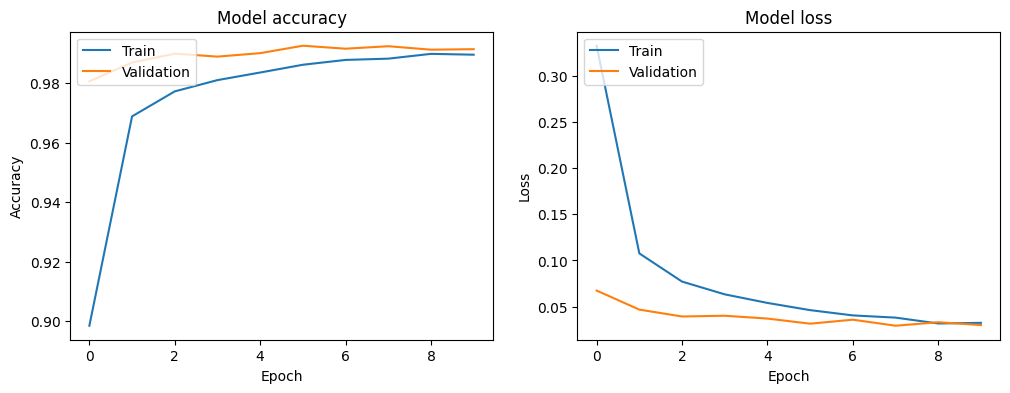

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Define the neural network model
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
batch_size = 128
epochs = 10
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')

# Visualize the training process
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
